# Problema

## Introdução

**Detector de Liveless**

Uma determinada fintech focada em consumidores finais pessoa física constataou um grande número de fraudes em transações bancárias.

O setor de fraudes apontou que existem clientes que se queixaram de não contratar serviços específicos, como o crédito pessoal, e após isso transferir para outras contas desconhecidas.

Após análises pelas equipes de segurança, os protocolos de utilização da senha foram realizados em conformidade, ou seja, cada cliente autenticou com sua própria senha de maneira regular.

Em função disso, o banco precisa arcar com reembolsos e medidas de contenção para evitar processos judiciais, pois os clientes alegam terem sido invadidos por hackers ou algo parecido.

Uma das formas de solucionar ou minimizar este problema é com a utilização de outras formas de autenticação, sobretudo em operações críticas, como a obtenção de crédito pessoal.

Desta forma podemos implementar uma verificação de identidade com prova de vida (liveness), que utilize uma verificação e identificação facial.

Caso o cliente não seja autenticado, ele será atendido por uma esteira dedicada e as evidências da não identificação serão encaminhadas para a área de IA para validação dos parâmetros e limiares para aperfeiçoamento do modelo.

Será necessário construir:

* Detector de faces
* Identificação de faces (podendo ser um comparador entre um rosto de documento e outra da prova de vida)
* Detecção de vivacidade (liveness) para evitar que um fraudador utilize uma foto estática.

Formas alternativas de prover a identificação e prova de vivacidade, além destas que foram solicitadas poderão ser submetidas.

## Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Iremos constuir uma forma de validar se uma determinada imagem foi ou não adulterada e se trata de uma produção fraudade.

Existem diversas formas de validar a vivacidade, e neste sentido conto com a criatividade de vocês dado que já dominam encontrar uma face numa imagem, aplicar marcos faciais e até mesmo construir uma rede neural convulacional.

A abordagem mais simples é pela construção de uma rede neural com imagens de fotos de rostos de outras fotos e fotos de rostos sem modificações. Tal classificador deverá classificar se dada imagem possui vivacidade ou não com uma pontuação de probabilidade.

Referências que abordam o tema para servir de inspiração:

1. [PyImageSearch](https://pyimagesearch.com/2019/03/11/liveness-detection-with-opencv/), Liveness detection with OpenCV;
2. [Kickertech](https://kickertech.com/face-liveness-detection-via-opencv-and-tensorflow/), Liveness detection via OpenCV and Tensorflow.
3. [Towards Data Science](https://towardsdatascience.com/real-time-face-liveness-detection-with-python-keras-and-opencv-c35dc70dafd3?gi=24f8e1b740f9), Real-time face liveness detection with Python, Keras and OpenCV.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

Grupo:

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Luiz Henrique             | RM 352631      | 5DTSR |
| Gildo Moraes             | RM 352486      | 5DTSR |
| Igor Mazzeto             | RM 352368      | 5DTSR |
| Mauricio Costa             | RM 49647      | 7BDT |

Professor:
- Michel

## Método de Avaliação

O projeto será avaliado pelos seguintes itens abaixo. A nota final será uma composição levando em consideração o peso de cada tema.

- Abordagem e organização da solução do problema (2 pontos)

- Organização de dados para treinamento de modelo de liveness (2 pontos)

- Treinamento de modelo de liveness (1,5 pontos)

- Métricas de desempenho do modelo (2 pontoS)

- Implementação de solução no Streamlit (+1 ponto adicional, template se encontra na pasta streamlit-app e deve ser complementado para incluir o modelo e demais etapas)

- Conclusões (2,5 pontos)


# Abordagem e Organização da Solução do Problema (2 Pontos)

Como o grupo pretende deteccar a prova de vivacidade de uma determinada imagem? Quais os passos e os building blocks deste processo?

Resposta:

- Download do [Dataset lcc-fasd](https://www.kaggle.com/datasets/faber24/lcc-fasd) que contia imagens reais e spoofing (Fotos da imagem real)
- Realizar o balanceamento do dataset
- Utilizar ImageDataGenerator para criar as bases de Treino, Validação e Teste
- Baixar o modelo pre-treinado do MobileNet, e carregar seus pesos.
- Treinar uma CNN para realizar a classificação e detectar se é Spoofing ou Real.
- Avaliar seu desempenho
- Utilizar o Biblioteca face_recognition para reconhecimento facial, em autenticação de Documentos.
- Utilizar o haarcascade para identificar e recortar as faces de novas imagens inputada pelo usuário
- Utilizar o modelo treinado para classificar se a foto da gerada pelo haarcascade é Real ou Fake
  


# Desenvolvimento da Solução (5,5 Pontos)
Detalhe o passo-a-passo do algoritmo de deteção de vivacidade.
Se optar pela construção e treinamento de um modelo de redes neurais convulucionais, apresente a arquitetura, prepare os dados de treinamento, realize o treinamento.

Siga os seguintes pontos:
- Organização de dados para treinamento de modelo de liveness (2 pontos)
- Treinamento de modelo de liveness (1,5 pontos)
- Métricas de desempenho do modelo (2 pontos)

## Importando bibliotecas

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pickle
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.mobilenet_v2 import MobileNetV2
from sklearn.metrics         import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.callbacks import ReduceLROnPlateau

## Funções

### Função de check de Documento

In [3]:
def  document_check(foto_documento, foto_usuario):
    import cv2
    import face_recognition as fr
    imgDocumento = fr.load_image_file(foto_documento)
    imgDocumento = cv2.cvtColor(imgDocumento,cv2.COLOR_BGR2RGB)
    imgTest = fr.load_image_file(foto_usuario)
    imgTest = cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB)
    imgDocumento_encode = fr.face_encodings(imgDocumento)[0]
    imgTest_encode = fr.face_encodings(imgTest)[0]
    comparacao = fr.compare_faces([imgDocumento_encode],imgTest_encode)

    if comparacao[0] == True:
        print("\nVerificação bem-sucedida | Documento confere com o usuário\n")
        plt.imshow(cv2.cvtColor(imgDocumento,cv2.COLOR_BGR2RGB))
        plt.show()
        plt.imshow(cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        print("\nVerificação mal-sucedida | Documento não confere com o usuário\n")
        plt.imshow(cv2.cvtColor(imgDocumento,cv2.COLOR_BGR2RGB))
        plt.show()
        plt.imshow(cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB))
        plt.show()

### Função de liviness Check

In [ ]:
def check_liviness(folder_path, filename):
     # Utiliza-se modelo pre-treinado de detecção de faces (Haar Cascade)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    image = cv2.imread(folder_path + filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=3, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cropped_face = image[y:y+h, x:x+w]


    cv2.imwrite(folder_path + 'face_' + filename , cropped_face)

    img = load_img(folder_path + 'face_' + filename, target_size=(224, 224))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)
    print(classes[0])

    if classes[0]>0.5:
        print("\nA foto é real\n")
        plt.imshow(image_RGB)
        plt.show()
        plt.imshow(img)
        plt.show()
    else:
        print('\nA foto é fake\n')
        plt.imshow(image_RGB)
        plt.show()
        plt.imshow(img)
        plt.show()



### Função detectora de faces

In [ ]:
def crop_faces(input_folder, output_folder):

    # Utiliza-se modelo pre-treinado de detecção de faces (Haar Cascade)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Se o caminho de saída não existir, ele é criado
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Utiliza-se um loop para pecorrer todas as imagens do caminho de entrada
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            input_image_path = os.path.join(input_folder, filename) # imagem
            output_image_path = os.path.join(output_folder, 'face_' + filename ) #face_imagem

            # Utiliza-se o OpenCV para ler as imagens
            image = cv2.imread(input_image_path)

            # Erro - Não foi possivel ler a imagem
            if image is None:
                print(f"Erro: Não foi possível ler a imagem {input_image_path}")
                continue

            # Converte-se a imagem para escala de cinza
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Utiliza-se o haar cascade
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))

            # Verifica-se se foi detectado alguma face
                # Caso nenhuma face seja detectada, retorna-se o warming.
            if len(faces) == 0:
                print(f"Warming: Nenhuma face detectada na imagem {input_image_path}")
                continue

                # Caso a imagem seja detectada, ela é recortada.
            for (x, y, w, h) in faces:
                cropped_face = image[y:y+h, x:x+w]
                break  # Crop only the first detected face

            # A face recortada é salva no caminho selecionado
            cv2.imwrite(output_image_path, cropped_face)
            print(f"Face salva em: {output_image_path}")

### Função arquitetura do ImageDataGenerator

In [ ]:

def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TESTING_DIR):

    size = 224
    batch = 32

    train_datagen = ImageDataGenerator(rescale=1 / 255,
                                     rotation_range=40,
                                     width_shift_range=.2,
                                     height_shift_range=.2,
                                     shear_range=.15,
                                     zoom_range=.15,
                                     horizontal_flip=True,
                                     fill_mode='nearest')


    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=batch,
                                                      class_mode='binary',
                                                      target_size=(size, size))



    validation_datagen = ImageDataGenerator(rescale=1 / 255)

    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=batch,
                                                                class_mode='binary',
                                                                target_size=(size, size))


    testing_datagen = ImageDataGenerator(rescale=1 / 255)

    testing_generator = testing_datagen.flow_from_directory(directory=TESTING_DIR,
                                                                batch_size=1,
                                                                class_mode='binary',
                                                                target_size=(size, size))

    return train_generator, validation_generator, testing_generator

### Função arquitetura do Modelo CNN

In [ ]:
!wget https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5

--2024-07-07 15:32:17--  https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4001:806::201b, 2800:3f0:4001:83a::201b, 2800:3f0:4001:82c::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4001:806::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9406464 (9,0M) [application/octet-stream]
Saving to: ‘mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5.2’

mobilenet_v2_weight 100%[===================>]   8,97M  12,3MB/s    in 0,7s    

2024-07-07 15:32:18 (12,3 MB/s) - ‘mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5.2’ saved [9406464/9406464]



In [ ]:
def crete_model_transfer_learning():

    local_weights_file = '/Users/luizramos/Repos/FIAP_ComputerVision/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'

    pre_trained_model = MobileNetV2(input_shape = (224, 224, 3),
                                    include_top = False,
                                    weights = None)

    pre_trained_model.load_weights(local_weights_file)


    for layer in pre_trained_model.layers:
        layer.trainable = False

    last_layer = pre_trained_model.get_layer('out_relu')
    last_output = last_layer.output

    x = tf.keras.layers.Flatten()(last_output)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(1,activation='sigmoid')(x)


    model = tf.keras.models.Model(inputs = pre_trained_model.input, outputs = x)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
            loss='binary_crossentropy',
            metrics=['accuracy'])

    return model

## Definido caminho da base de dados

In [ ]:
TRAINING_DIR = '/Users/luizramos/Repos/FIAP_ComputerVision/data/training'
VALIDATION_DIR = '/Users/luizramos/Repos/FIAP_ComputerVision/data/validation'
TESTING_DIR = '/Users/luizramos/Repos/FIAP_ComputerVision/data/testing'

## Criando ImageDataGenerator

In [ ]:
train_generator, validation_generator, testing_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR, TESTING_DIR)

Found 7452 images belonging to 2 classes.
Found 1591 images belonging to 2 classes.
Found 1359 images belonging to 2 classes.


## Treinando Modelo

In [ ]:
with tf.device('/gpu:0'):
    model = crete_model_transfer_learning()
    history = model.fit(train_generator,
                        epochs=15,
                        steps_per_epoch = 7452 // 32,
                        validation_steps = 1591 // 32,
                        verbose=1,
                        validation_data=validation_generator
                        )

Epoch 1/15
232/232 [==============================] - 155s 659ms/step - loss: 0.4982 - accuracy: 0.8221 - val_loss: 0.3920 - val_accuracy: 0.8214
Epoch 2/15
232/232 [==============================] - 140s 602ms/step - loss: 0.2939 - accuracy: 0.8764 - val_loss: 0.3863 - val_accuracy: 0.8151
Epoch 3/15
232/232 [==============================] - 144s 618ms/step - loss: 0.2527 - accuracy: 0.8943 - val_loss: 0.3236 - val_accuracy: 0.8495
Epoch 4/15
232/232 [==============================] - 145s 624ms/step - loss: 0.2376 - accuracy: 0.9000 - val_loss: 0.2140 - val_accuracy: 0.9056
Epoch 5/15
232/232 [==============================] - 147s 632ms/step - loss: 0.2115 - accuracy: 0.9115 - val_loss: 0.2725 - val_accuracy: 0.8884
Epoch 6/15
232/232 [==============================] - 147s 632ms/step - loss: 0.1956 - accuracy: 0.9167 - val_loss: 0.2449 - val_accuracy: 0.8967
Epoch 7/15
232/232 [==============================] - 148s 635ms/step - loss: 0.2003 - accuracy: 0.9189 - val_loss: 0.2905 -

## Salvando modelo

In [ ]:
with open('history_augmented.pkl', 'wb') as f:
    pickle.dump(history.history, f)
    model.save('final_model.keras')

## Avaliando o modelo com base de teste

## Matriz de confusão

In [ ]:
test_scores = model.evaluate(testing_generator, steps=1359)
print("Test results Accuracy: {0:.2f}% and Loss: {0:.2f}".format(test_scores[1]*100, test_scores[0]))

1359/1359 [==============================] - 34s 25ms/step - loss: 0.4919 - accuracy: 0.8278
Test results Accuracy: 82.78% and Loss: 82.78


1359/1359 [==============================] - 35s 26ms/step


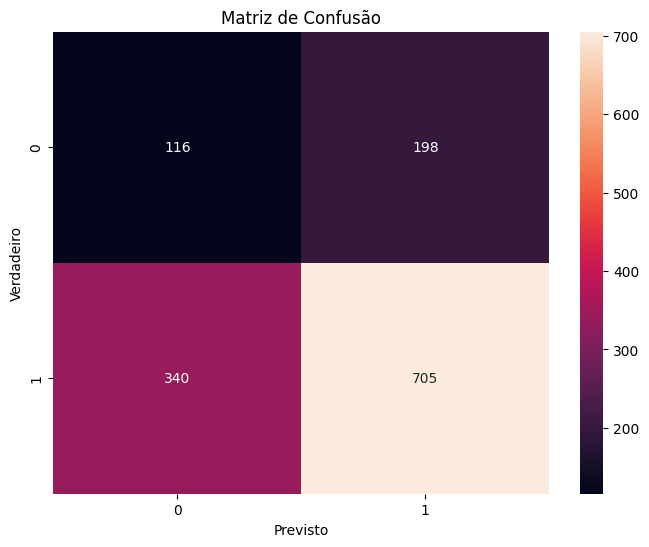

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.25      0.37      0.30       314
           1       0.78      0.67      0.72      1045

    accuracy                           0.60      1359
   macro avg       0.52      0.52      0.51      1359
weighted avg       0.66      0.60      0.63      1359



In [ ]:
y_pred_value = np.squeeze(model.predict(testing_generator, steps=1359, verbose=1))
y_pred = np.zeros(y_pred_value.shape).astype(np.int32)
y_pred[y_pred_value > 0.50] = 1
y_true = testing_generator.classes

# Criando a matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred, )

# Exibindo a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='g')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


# Exibindo um relatório de classificação
print('Relatório de Classificação:')
print(classification_report(y_true, y_pred))

# Teste Fim a Fim

Simule a operação fim-a-fim, com uma imagem de entrada forjada (foto de foto de um rosto) e outra com uma imagem de rosto, exibindo o resultado da classificação e a pontuação de cada classe.

Com a implementação da solução na forma de uma aplicação do [Streamlit](https://www.streamlit.io/) (veja a pata streamlit-app e use o template) vale 1 ponto adicional. [Exemplo StreamLit](https://github.com/michelpf/fiap-ml-visao-computacional-detector-liveness/tree/master/streamlit-app)

Se utilizou o Streamlit, compartilhe a URL do aplicativo publicado

## Check de Documento (Face Recognition)


Verificação bem-sucedida | Documento confere com o usuário



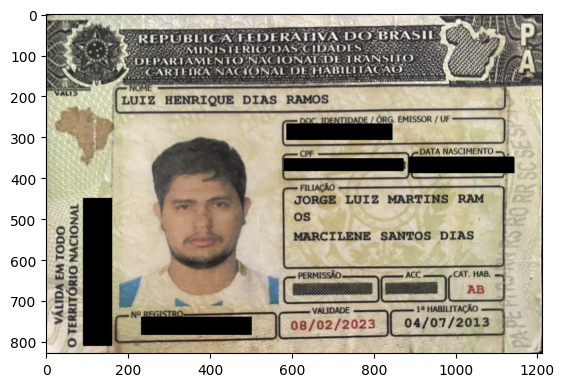

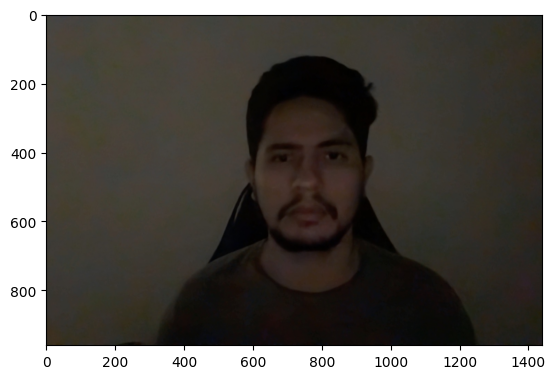

In [4]:
document_check('/content/cnh.png','/content/real.jpg')


Verificação mal-sucedida | Documento não confere com o usuário



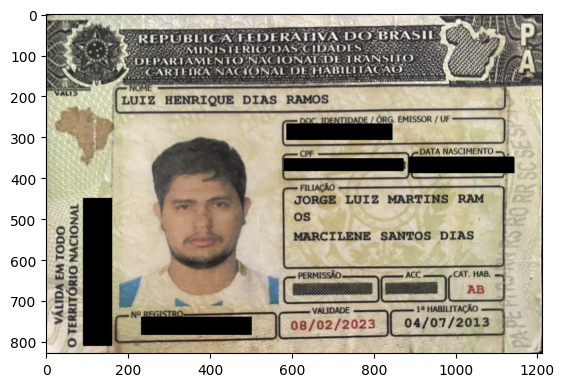

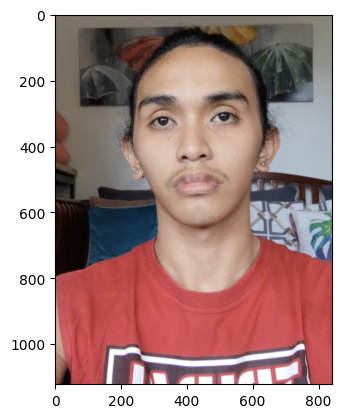

In [6]:
document_check('/content/cnh.png','/content/not_user.png')

## Check de Liviness

1/1 [==============================] - 0s 288ms/step
[0.00388377]

A foto é fake



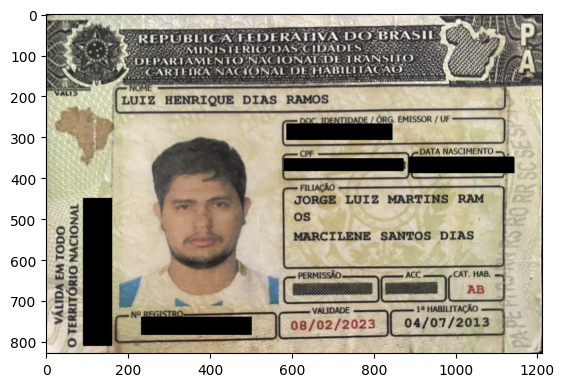

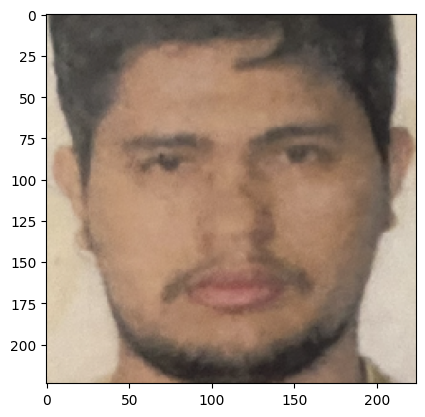

In [ ]:
check_liviness('/Users/luizramos/Repos/FIAP_ComputerVision/production/', 'cnh.png')

1/1 [==============================] - 0s 79ms/step
[0.6776098]

A foto é real



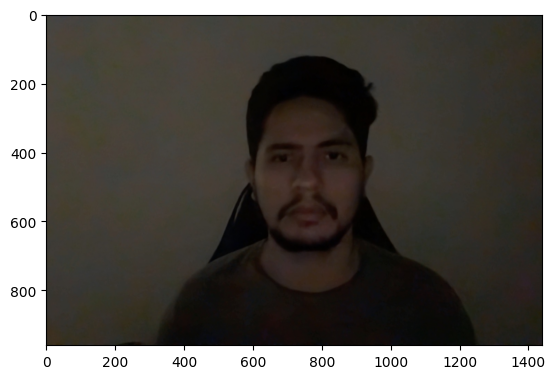

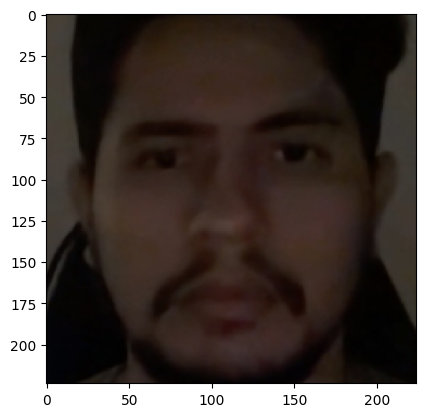

In [ ]:
check_liviness('/Users/luizramos/Repos/FIAP_ComputerVision/production/', 'real.jpg')

# Conclusão (2,5 Pontos)
Dado todo o estudo e pesquisa, quais foram as conclusões sobre a solução, o que funcionou, o que não funcionou e quais os detalhes que observariam numa nova versão e melhorias do processo?

Dificuldades:

1. A maior dificuldade do projeto foi a baixa quantidades de amostras de fotos reais no dataset, o que fez ele ter um desempenho menor em classificação de classes reais. Foi necessário inclusive obter mais imagens reais para melhorar o desempenho do modelo, através de um outros datasets,[RealvsFake Anti Spoofing video Classification](https://www.kaggle.com/datasets/trainingdatapro/real-vs-fake-anti-spoofing-video-classification) e [anti-Spoofing](https://www.kaggle.com/datasets/tapakah68/anti-spoofing), que continham vídeos. Foi utilizado o script abaixo para capturar os frames, e em seguida a função `crop_faces` (definida no inicio do projeto) que utiliza o haarcascade para cortar apenas os rostos.

`!ffmpeg -i caminho_do_video/{i}.mp4 -vf "select=gt(scene\,0.01)"  -vsync vfr caminho_do_saida_imagem/person_{i}_%04d.png
`

2. Arquitetura da CNN

- Foi utilizado para teste várias arquiteturas de CNN, testando combinações de convoluções e pooling, e camada Densa. Foi pouco efetivo.

- Foi utilizado a Arquitetura liviness, abordado pelo PyimageSearch, contudo não surtiu muito efeito.

- Foi utilizado a arquiettura pre-treinada MobileNetV2. Foi utilizado várias das camadas do modelo como input inicial do modelo sequencial, contudo o que melhor performou foi o modelo completo (com todas as camadas).

3. Incompatibilidade com Bibliotecas

- O modelo foi treinado localmente no meu notebook, e durante o processo de criação da função de reconhecimento facial (Validação de documentos). Houve uma impossibilidade de instalação da biblioteca `face_recognition`, que era primordial para a execução da função. Nesse caso foi necessário realizar os testes no google Colabory.

4. Tempo de demora para Treinar o modelo

- O modelo demorava muito para treinar, e quando eram feito teste com arquiteturas mais robustas, o modelo levava horas para finalizar o treinamento, e muitas vezes os resultados eram insatisfatório, desta forma era necessário dispor de ainda mais tempo para realizar novos testes.

Nova versão e melhoria do Processo:

- Deixaria uma estação de trabalho com o ambiente virtual com as bibliotecas necessárias para o funcionamento basico do projeto
- Realizaria uma "Face Scrapping" em sites de video como o Youtube para aumentar a quantidade de amostras de fotos reais.
- Melhoria o processo de input de imagem, para ser obtido diretamente com uma webcam.
- Dentro dessa obtenção de imagem pela webcam, utilizaria o OpenCV para marcar o local onde o rosto do usuário deve ser posicionado, para geração de dados de maior qualidade